In [72]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats
%matplotlib inline

In [5]:
from sklearn.datasets import load_boston
data = load_boston()

In [6]:
print(data.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [7]:
data.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [8]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
df['MEDV'] = data.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


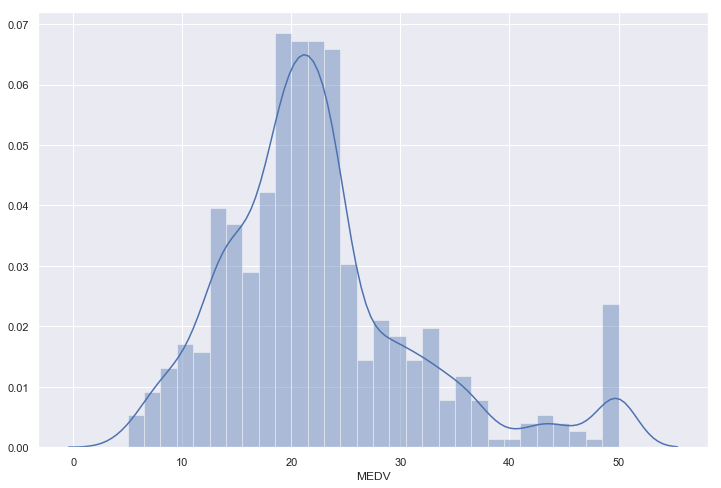

In [141]:
sns.set(rc={'figure.figsize':(12,8)})
rm_dist = sns.distplot(df['MEDV'], bins=30)
fig2 = rm_dist.get_figure()
fig2.savefig('rm_dist.png')
plt.show()

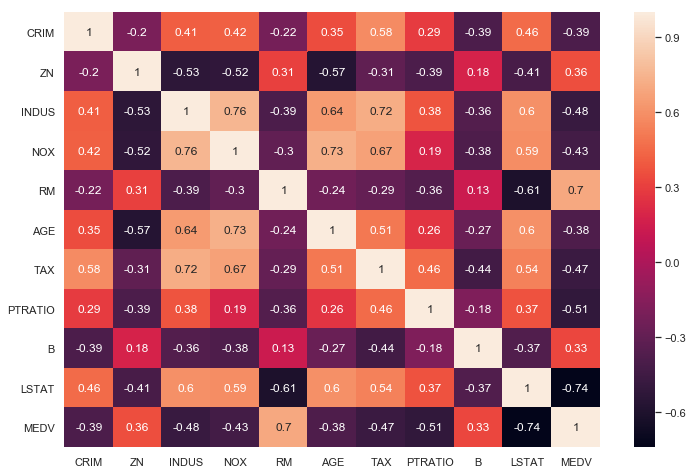

In [140]:
pizza_plot = df.corr().round(2)
heatmap = sns.heatmap(data=pizza_plot, annot=True)
fig = heatmap.get_figure()
fig.savefig('correlation.png')

We have selected the median house prices (MEDV) as our target variable. It appears that RM (number of rooms) has a high positive correlation with MEDV and LSTAT has a high negative correlation. We will use these as our features.

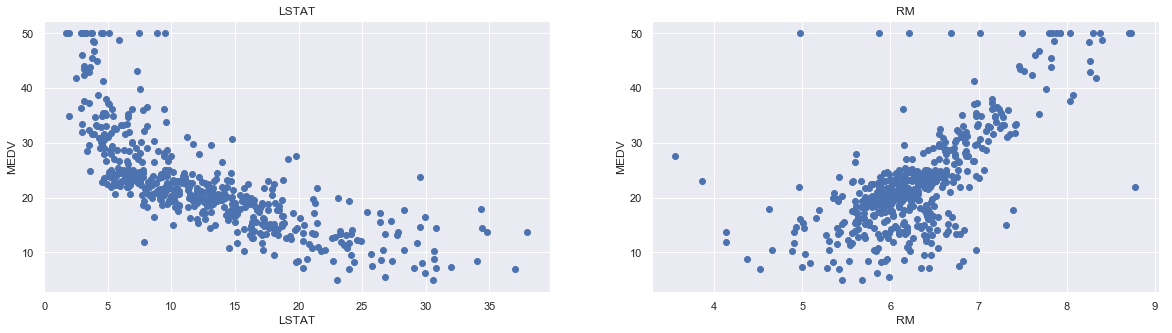

In [137]:
plt.figure(figsize=(20,5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = df[col]
    y = target
    
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    plt.savefig('scatterplot.png')

We can see a strong positive correlation with RM, and a negative correlation with LSTAT. Let's try and remove outliers.

First, let's visuzlize the data using a boxplot:

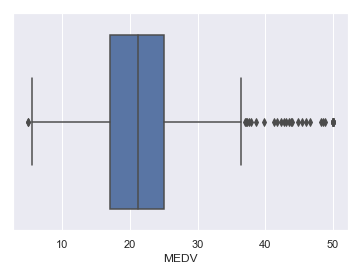

In [73]:
sns.boxplot(x=df['MEDV'])

We will use the z-score to try and remove values with a standard deviation greater than 3

In [75]:
z = np.abs(stats.zscore(df))
print(z)

[[0.41978194 0.28482986 1.2879095  ... 0.44105193 1.0755623  0.15968566]
 [0.41733926 0.48772236 0.59338101 ... 0.44105193 0.49243937 0.10152429]
 [0.41734159 0.48772236 0.59338101 ... 0.39642699 1.2087274  1.32424667]
 ...
 [0.41344658 0.48772236 0.11573841 ... 0.44105193 0.98304761 0.14880191]
 [0.40776407 0.48772236 0.11573841 ... 0.4032249  0.86530163 0.0579893 ]
 [0.41500016 0.48772236 0.11573841 ... 0.44105193 0.66905833 1.15724782]]


In [105]:
df_cleaned = df[(z < 2.5).all(axis=1)]

In [77]:
df_cleaned.shape

(415, 13)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


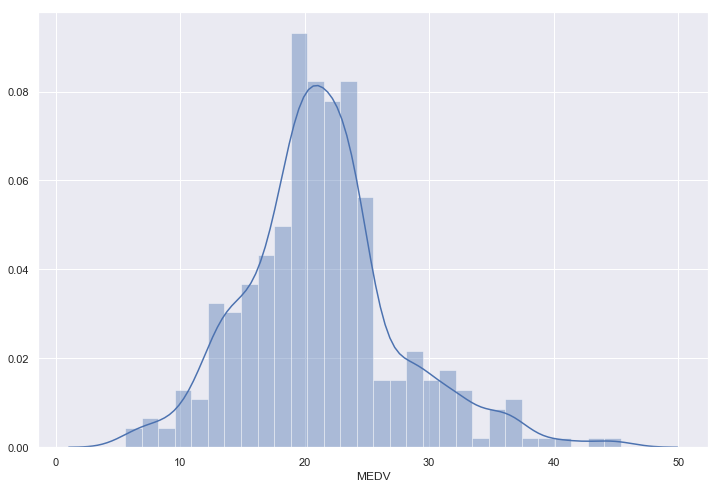

In [142]:
sns.set(rc={'figure.figsize':(12,8)})
cleaned_dist = sns.distplot(df_cleaned['MEDV'], bins=30)
fig3 = cleaned_dist.get_figure()
fig3.savefig('cleaned_dist.png')
plt.show()

We can see that the data appears to be more normal

### Define normalization function

This is to correct the right-skewed LSTAT feature

In [52]:
def normalize(column):
    upper = column.max()
    lower = column.min()
    y = (column - lower)/(upper-lower)
    return y

Text(0, 0.5, 'MEDV')

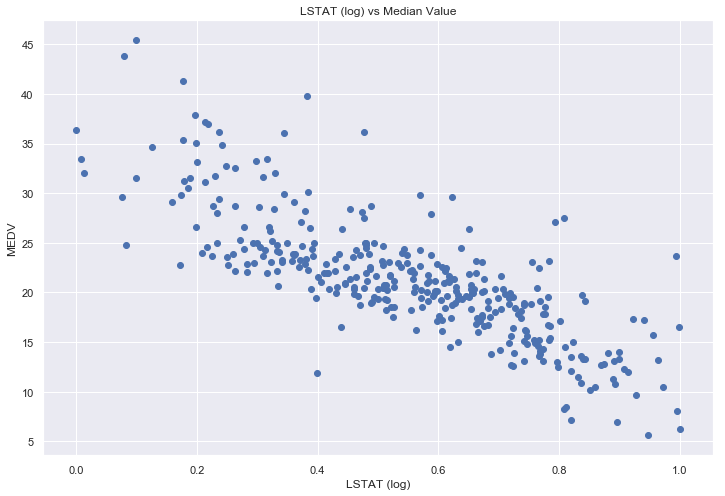

In [133]:
log_lstat = np.log(df_cleaned.LSTAT + 1)
lstat_normalized = normalize(log_lstat)
x = lstat_normalized
y = df_cleaned['MEDV']

plt.scatter(x,y, marker='o')
plt.title('LSTAT (log) vs Median Value')
plt.xlabel('LSTAT (log)')
plt.ylabel('MEDV')

### Plot LSTAT to check normality

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


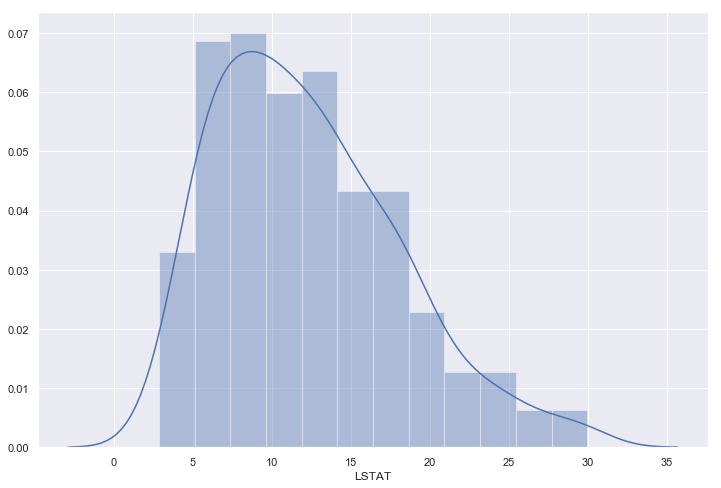

In [147]:
right_skew = sns.distplot(df_cleaned.LSTAT)
fig5 = right_skew.get_figure()
fig5.savefig('right_skew.png')

### Now plot log-transformed LSTAT

//anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


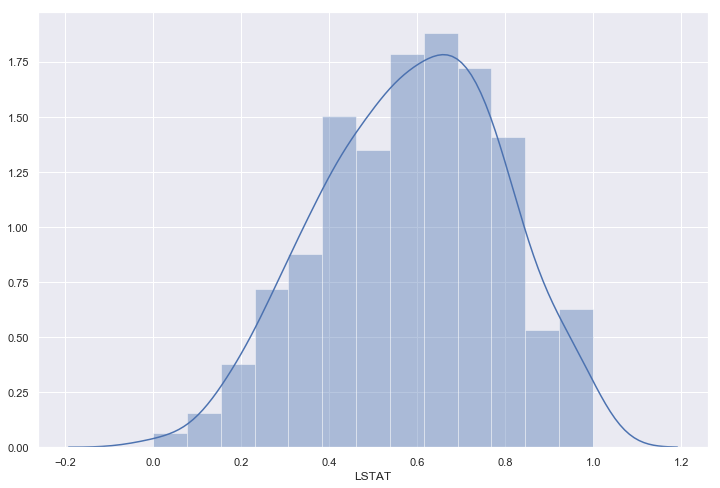

In [84]:
normalized sns.distplot(lstat_normalized)

### Drop highly correlated features

In [121]:
df_cleaned.drop(columns=['RAD', 'CHAS', 'DIS', 'NOX'], inplace=True)

//anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [122]:
df_cleaned.head()

,CRIM,ZN,INDUS,RM,AGE,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,6.575,65.2,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,6.421,78.9,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,7.185,61.1,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,6.998,45.8,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,7.147,54.2,222.0,18.7,396.90,5.33,36.2


### Check heatmap after dropping highly-correlated features

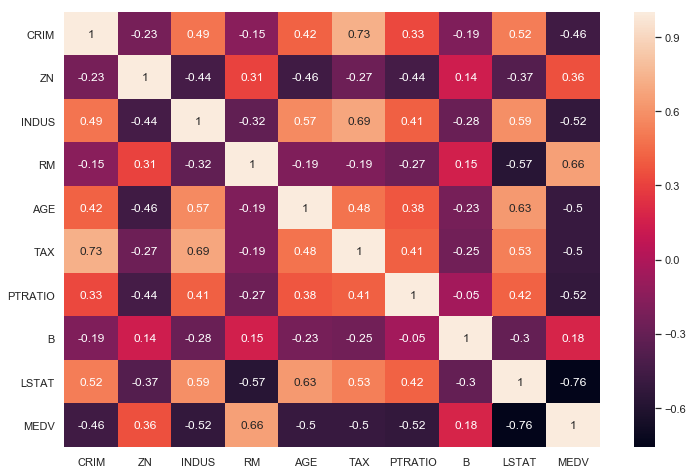

In [145]:
pizza_plot2 = df_cleaned.corr().round(2)
heatmap2 = sns.heatmap(data=pizza_plot2, annot=True)
fig4 = heatmap2.get_figure()
fig4.savefig('correlation2.png')

We see here that there is no correlation with an absolute value greater than 0.8, which is the threshhold I set.

### Prepare base model for training

In [124]:
X = pd.DataFrame(np.c_[df['LSTAT'], df['RM']], columns = ['LSTAT', 'RM'])
Y = df['MEDV']

### Split the data into training and testing sets

In [125]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=22)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [126]:
X_train.head()

,LSTAT,RM
164,11.64,5.854
312,11.72,6.023
120,14.37,5.870
274,3.53,6.758
26,14.81,5.813


### Train our model

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluate model using RMSE and R-squared

In [45]:
y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r_squared = r2_score(Y_train, y_train_predict)

In [46]:
print('The model performance for training set')
print("--------------------------------------")
print(f'RMSE is {rmse}.')
print(f'R squared is {r_squared}.')

The model performance for training set
--------------------------------------
RMSE is 5.466647472725592.
R squared is 0.6414011880015562.


### Evaluate testing set

In [47]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r_squared = r2_score(Y_test, y_test_predict)

In [48]:
print(f'RMSE is {rmse}.')
print(f'R squared is {r_squared}.')

RMSE is 5.765763360830938.
R squared is 0.6250712649086813.


### Evaluate model with normalized features

In [134]:
X = pd.DataFrame(np.c_[lstat_normalized, df_cleaned['RM']], columns = ['LSTAT', 'RM', 'TAX', 'CRIM', 'ZN', 'INDUS', 'AGE', 'PTRATIO'])
Y = df_cleaned['MEDV']

ValueError: Shape of passed values is (2, 348), indices imply (8, 348)

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=22)

model = LinearRegression()
model.fit(X_train, Y_train)

y_train_predict = model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r_squared = r2_score(Y_train, y_train_predict)

print('The model performance for training set')
print("--------------------------------------")
print(f'RMSE is {rmse}.')
print(f'R squared is {r_squared}.')

The model performance for training set
--------------------------------------
RMSE is 4.239614035402868.
R squared is 0.7233234549179748.


In [89]:
y_test_predict = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r_squared = r2_score(Y_test, y_test_predict)

print('The model performance for testing set')
print("--------------------------------------")
print(f'RMSE is {rmse}.')
print(f'R squared is {r_squared}.')

The model performance for testing set
--------------------------------------
RMSE is 4.936376738209098.
R squared is 0.6247178404347193.


In [143]:
f = 'MEDV~RM+LSTAT'
model = ols(formula=f, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.639
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     444.3
Date:                Wed, 02 Oct 2019   Prob (F-statistic):          7.01e-112
Time:                        14:30:58   Log-Likelihood:                -1582.8
No. Observations:                 506   AIC:                             3172.
Df Residuals:                     503   BIC:                             3184.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3583      3.173     -0.428      0.669      -7.592       4.875
RM             5.0948      0.444     11.463      0.000       4.222       5.968
LSTAT         -0.6424      0.044    -14.689      0.000      -0.728      -0.556
==============================================================================
Omnibus:                      145.712   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              457.690
Skew:                           1.343   Prob(JB):                    4.11e-100
Kurtosis:                       6.807   Cond. No.                         202.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Using Statsmodels to perform regression, find residuals, make QQ plot

In [127]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [135]:
f = 'MEDV~RM+LSTAT+TAX+CRIM+ZN+INDUS+AGE+PTRATIO'
model = ols(formula=f, data=df_cleaned).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     108.4
Date:                Wed, 02 Oct 2019   Prob (F-statistic):           1.14e-88
Time:                        13:50:09   Log-Likelihood:                -910.79
No. Observations:                 348   AIC:                             1840.
Df Residuals:                     339   BIC:                             1874.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     11.6055      4.067      2.853      0.005       3.605      19.606
RM             5.0552      0.501     10.080      0.000       4.069       6.042
LSTAT         -0.3639      0.055     -6.607      0.000      -0.472      -0.256
TAX           -0.0028      0.002     -1.404      0.161      -0.007       0.001
CRIM          -0.1201      0.061     -1.962      0.051      -0.241       0.000
ZN            -0.0287      0.017     -1.739      0.083      -0.061       0.004
INDUS          0.0112      0.044      0.257      0.797      -0.075       0.097
AGE           -0.0218      0.010     -2.252      0.025      -0.041      -0.003
PTRATIO       -0.7573      0.121     -6.239      0.000      -0.996      -0.519
==============================================================================
Omnibus:                       45.861   Durbin-Watson:                   1.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.531
Skew:                           0.787   Prob(JB):                     2.41e-17
Kurtosis:                       4.673   Cond. No.                     9.83e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

//anaconda3/envs/learn-env/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


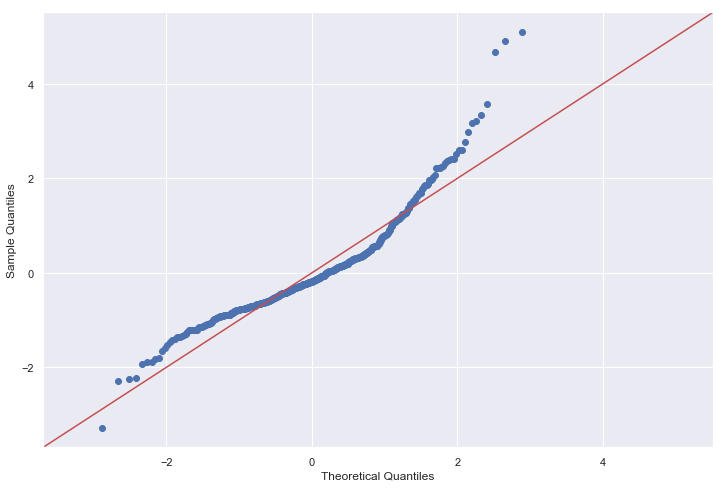

In [144]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.savefig('qqplot.png')
fig.show()